In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union


#### Select lakes in hma from global dataset

In [2]:
path_hma = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_lakes = 'data/lakes/HydroLakes_v10_region.gpkg' 
path_lakes_hma = 'data/lakes/HydroLakes_v10_hma.gpkg' 

In [3]:
## Read data
lakes_gpd = gpd.read_file(path_lakes)
hma_gpd = gpd.read_file(path_hma)
print(lakes_gpd.shape)
lakes_gpd.head(2)


(7912, 22)


,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,12,Balkhash,Kazakhstan,Asia,SWBD,1,0,16717.89,3092.2,6.75,...,1,6.7,470.083,2745.3,338,-1.0,404800.5,74.602083,46.385417,"MULTIPOLYGON (((74.98387 46.83114, 74.98618 46..."
1,131,Alakol,Kazakhstan,Asia,SWBD,1,0,2919.34,567.4,2.96,...,1,22.1,55.947,13347.0,347,-1.0,63248.1,81.672917,46.152083,"MULTIPOLYGON (((81.54844 46.50765, 81.55058 46..."


In [4]:
## select the lakes in the hma region
poly_hma = unary_union(hma_gpd['geometry'])
lakes_id = np.where(poly_hma.contains(lakes_gpd['geometry'].centroid) == True)[0]
lakes_hma = lakes_gpd.iloc[lakes_id] 


<Axes: >

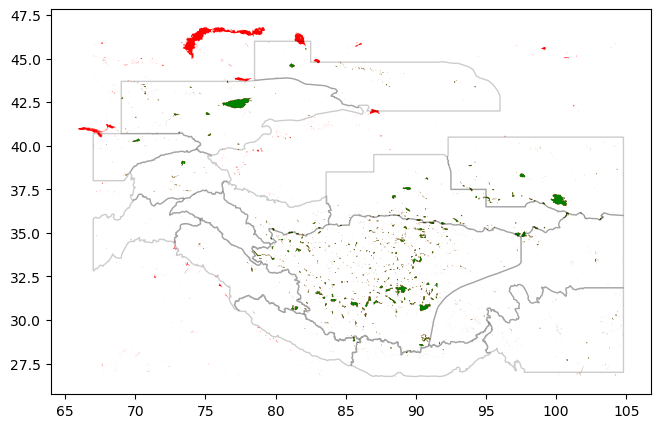

In [5]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
lakes_gpd.plot(color='red', ax=ax)
lakes_hma.plot(color='green', ax=ax)
hma_gpd.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.2)


In [6]:
# ### Write out
# lakes_hma.to_file(path_lakes_hma, driver='GPKG')
